In [3]:
try:
    import pyNN.spiNNaker as sim
except Exception:
    import spynnaker8 as sim
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt

In [4]:
#spynnaker setup
sim.setup(timestep=0.1, min_delay=0.1, max_delay=1.0)

2020-03-25 14:35:52 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2020-03-25 14:35:52 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2020-03-25 14:35:52 WARNING: /home/jovyan/SpeechRecognition/reports has 10 old reports that have not been closed
2020-03-25 14:35:52 WARNING: /home/jovyan/SpeechRecognition/application_generated_data_files has 10 old reports that have not been closed
2020-03-25 14:35:52 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2020-03-25 14:35:52 INFO: Setting time sca

['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


0

2020-02-21 18:41:10 WARNING: Formal PyNN specifies that v should be set using initial_values not cell_params
2020-02-21 18:41:10 WARNING: Formal PyNN specifies that u should be set using initial_values not cell_params
2020-02-21 18:41:10 WARNING: Formal PyNN specifies that v should be set using initial_values not cell_params
2020-02-21 18:41:10 WARNING: Formal PyNN specifies that u should be set using initial_values not cell_params
2020-02-21 18:41:11 INFO: Starting execution process
2020-02-21 18:41:11 INFO: Simulating for 50000 0.1ms timesteps using a hardware timestep of 10us
2020-02-21 18:41:19 INFO: Time 0:00:08.463751 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-02-21 18:41:42 INFO: Time 0:00:23.024532 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph e

Weights:[( 0,  2, 0.00927734) ( 0,  7, 0.01000977) ( 0,  8, 0.01000977)
 ( 0, 11, 0.00952148) ( 0, 15, 0.00976562) ( 0, 16, 0.01000977)
 ( 0, 17, 0.01000977) ( 0, 18, 0.01000977) ( 0, 28, 0.01000977)
 ( 0, 29, 0.01000977) ( 0, 34, 0.01000977) ( 0, 35, 0.01000977)
 ( 0, 39, 0.00927734) ( 1,  2, 0.01000977) ( 1,  7, 0.01000977)
 ( 1, 10, 0.01000977) ( 1, 11, 0.01000977) ( 1, 13, 0.01000977)
 ( 1, 17, 0.00952148) ( 1, 18, 0.00976562) ( 1, 21, 0.00976562)
 ( 1, 23, 0.01000977) ( 1, 24, 0.00952148) ( 1, 28, 0.01000977)
 ( 1, 29, 0.00976562) ( 1, 30, 0.0090332 ) ( 1, 39, 0.01000977)
 ( 2,  2, 0.01000977) ( 2,  3, 0.00805664) ( 2,  5, 0.01000977)
 ( 2,  9, 0.00952148) ( 2, 10, 0.00976562) ( 2, 15, 0.00708008)
 ( 2, 17, 0.00708008) ( 2, 21, 0.00854492) ( 2, 22, 0.01000977)
 ( 2, 25, 0.00878906) ( 2, 27, 0.00830078) ( 2, 29, 0.00976562)
 ( 2, 32, 0.00927734) ( 2, 34, 0.01000977) ( 2, 36, 0.00976562)
 ( 2, 37, 0.00976562) ( 2, 38, 0.00952148) ( 3,  1, 0.01000977)
 ( 3,  2, 0.00952148) ( 3,  6, 0

<IPython.core.display.Javascript object>


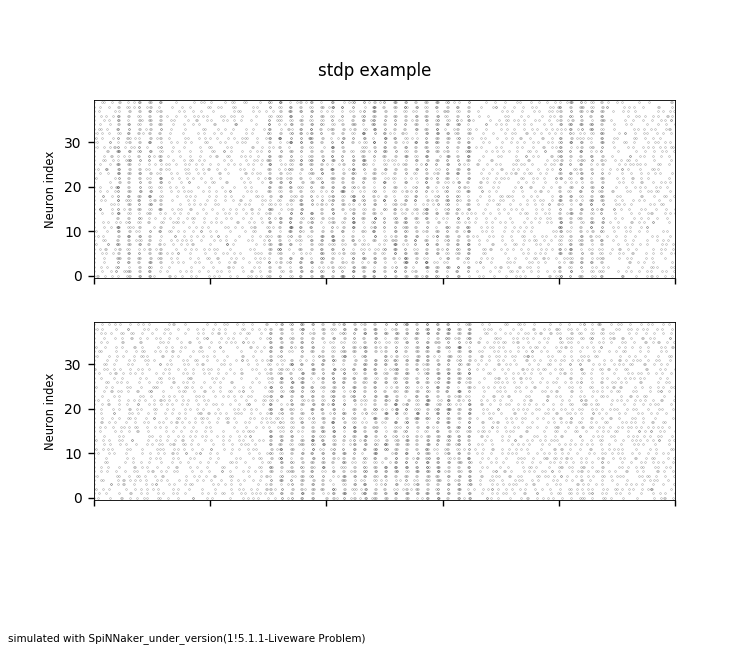

2020-02-21 18:43:46 WARNING: During the extraction of data of 8200000 bytes from memory address 1678456148, attempt 0 had 47 sequences that were lost.


In [9]:
model = sim.extra_models.Izhikevich_cond
# param_a = 0.03
# param_b = -2
# param_c = -50
# param_d = 100
# param_u = 0
# param_v = -60

# cell_params =  {'a': param_a, 'b': param_b, 'c': param_c, 'd': param_d, 'v': param_v, 
#                 'u': param_u, 'tau_syn_E': 6, 'tau_syn_I': 4, 'i_offset':5}

snr_a=0.02 #0.005
snr_b=0.2 #0.32
snr_c=-65 #-65
snr_d=8 #2
snr_v_init = 30 #-70
snr_u_init = -13 #snr_b * snr_v_init

tau_ampa = 6###excitatory synapse time constant
tau_gabaa= 4### inhibitory synapse time constant
E_ampa = 0.0
E_gabaa = -80.0
current_bias = -2.
cell_params = {'a': snr_a, 'b': snr_b, 'c': snr_c, 'd': snr_d,
                   'v': snr_v_init, 'u': snr_u_init,
                   'tau_syn_E': tau_ampa, 'tau_syn_I': tau_gabaa,
                   'i_offset': current_bias,
                   'e_rev_E': E_ampa, 'e_rev_I': E_gabaa,
                   }

e_rate = 80
in_rate = 300

n_stim_test = 5
n_stim_pairing = 20
dur_stim = 20

pop_size = 40

ISI = 90
start_test_pre_pairing = 200
start_pairing = 1500
start_test_post_pairing = 700

simtime = (start_pairing + start_test_post_pairing + ISI*(n_stim_pairing+n_stim_test) + 550.)

IAddPre = []
IAddPost = []

pre_pop = sim.Population(pop_size, model(**cell_params))
post_pop = sim.Population(pop_size, model(**cell_params))

for i in range(n_stim_test):
    IAddPre.append(sim.Population(pop_size, sim.SpikeSourcePoisson(rate=in_rate, start = start_test_pre_pairing + ISI * i, duration = dur_stim)))

for i in range(n_stim_pairing):
    IAddPre.append(sim.Population(pop_size, sim.SpikeSourcePoisson(rate = in_rate, start = start_pairing  + ISI * i, duration = dur_stim)))
    IAddPost.append(sim.Population(pop_size, sim.SpikeSourcePoisson(rate = in_rate, start = start_pairing  + ISI * i + 10., duration = dur_stim)))
    
for i in range(n_stim_test):
    IAddPre.append(sim.Population(pop_size, sim.SpikeSourcePoisson(rate = in_rate, start = start_pairing  + ISI * n_stim_pairing + start_test_post_pairing + ISI * i, duration = dur_stim)))
    
INoisePre = sim.Population(pop_size, sim.SpikeSourcePoisson(rate = e_rate, start = 0, duration = simtime), label="expoisson")
INoisePost = sim.Population(pop_size, sim.SpikeSourcePoisson(rate = e_rate, start = 0, duration = simtime), label="expoisson")

JEE = 3
ee_connector = sim.OneToOneConnector()

sim.Projection(INoisePre, pre_pop, ee_connector, receptor_type = 'excitatory', synapse_type = sim.StaticSynapse(weight = JEE * 0.05))
sim.Projection(INoisePost, post_pop, ee_connector, receptor_type = 'excitatory', synapse_type = sim.StaticSynapse(weight = JEE * 0.05))

for i in range(len(IAddPre)):
    sim.Projection(IAddPre[i], pre_pop, ee_connector, receptor_type = 'excitatory', synapse_type = sim.StaticSynapse(weight = JEE * 0.05))
    
for i in range(len(IAddPost)):
    sim.Projection(IAddPost[i], post_pop, ee_connector, receptor_type = 'excitatory', synapse_type = sim.StaticSynapse(weight = JEE * 0.05))
    
stdp_model = sim.STDPMechanism(timing_dependence=sim.SpikePairRule(tau_plus = 20., tau_minus = 20., A_plus = 0.02, A_minus = 0.02), weight_dependence = sim.AdditiveWeightDependence(w_min=0, w_max=0.01))

plastic_projection = sim.Projection(pre_pop, post_pop, sim.FixedProbabilityConnector(p_connect=0.5), synapse_type=stdp_model)

#simulation and results
pre_pop.record(['v', 'spikes'])
post_pop.record(['v', 'spikes'])

sim.run(simtime)

print("Weights:{}".format(plastic_projection.get('weight', 'list')))

pre_spikes = pre_pop.get_data('spikes')
post_spikes = post_pop.get_data('spikes')

Figure(Panel(pre_spikes.segments[0].spiketrains, yticks=True, markersize=0.2, xlim=(0,simtime)), Panel(post_spikes.segments[0].spiketrains, yticks=True, markersize=0.2, xlim=(0,simtime)), title="stdp example", annotations="simulated with {}".format(sim.name())).save('stdpSpiketrainsModTimestep-2.png')


sim.end()

NameError: name 'plastic_projection' is not defined